In [27]:
#Import the packages that we are going to use for this dataset
import pandas as pd #Dataframe package
import numpy as np #Linear algebra package
import matplotlib.pyplot as plt #Plotting package
import seaborn as sns #Advanced plotting package

## Import Dataset both the Train and the Test Data

In [28]:
df_1 = pd.read_csv('train.csv')
df_2 = pd.read_csv('test.csv')
if 'Survived' not in df_2.columns:
#This checks if the column 'Survived' is in the test data, if not it creates it and fills it with 0s
    df_2['Survived'] = 0

    df = pd.concat([df_1, df_2], axis=0)
    # Combine training and test data into a single dataframe for preprocessing
    df = df.set_index('PassengerId')
    # Set 'Id' as the index for easier data manipulation

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# To better understand the data, we can use the describe() function to get a statistical summary of the numerical columns in the dataframe. This will give us insights into the distribution, central tendency, and spread of the data, which can help us identify any potential issues or patterns that may be relevant for our analysis or modeling.
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.261268,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.439494,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [30]:
# We will separate between numerical and categorical values to better understand the data and to be able to do the right preprocessing steps for each type of data.
df_num = df[['Age', 'Fare', 'SibSp', 'Parch']]
df_cat = df[['Pclass', 'Survived', 'Sex', 'Ticket', 'Cabin', 'Embarked']]


## We will understand the shape of the data (Histograms, box plots, etc)

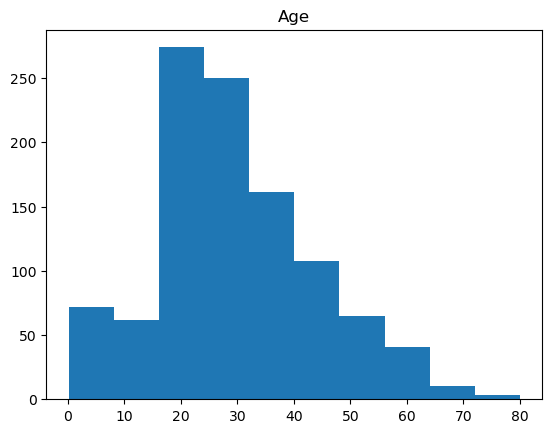

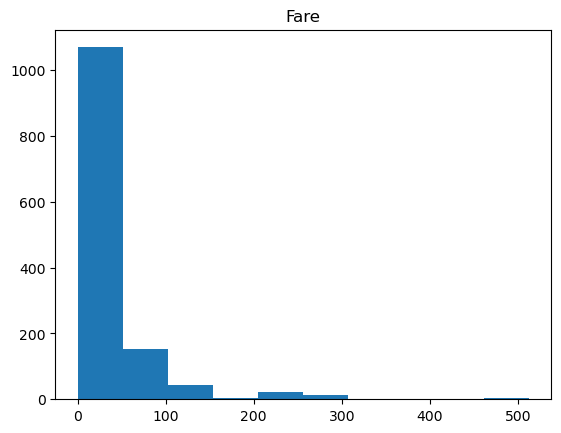

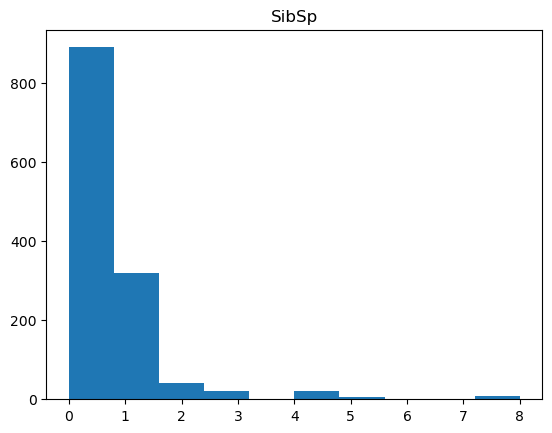

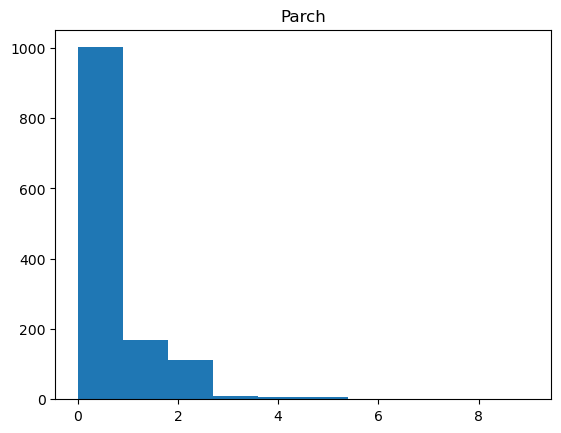

In [31]:
#Distribution of the numerical features
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

We can see that 'Fare', 'SibSp' and 'Parch' does NOT follow a normal distribution. 'Fare' is somehting we would like to normalize as there is a spike at a very low price. 'SibSp' and 'Parch' have very little few categories that would be insignificant to look at them more in depth.


            Age      Fare     SibSp     Parch
Age    1.000000  0.178740 -0.243699 -0.150917
Fare   0.178740  1.000000  0.160238  0.221539
SibSp -0.243699  0.160238  1.000000  0.373587
Parch -0.150917  0.221539  0.373587  1.000000


<Axes: >

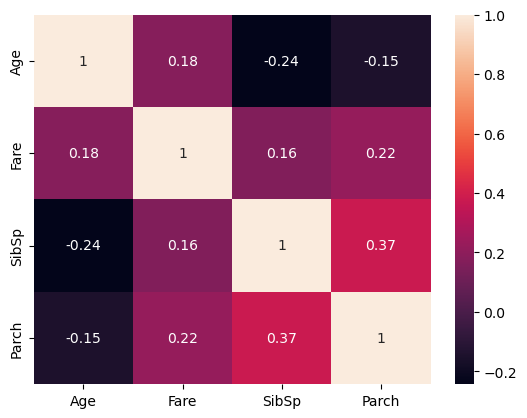

In [32]:
print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True)

In [33]:
# Compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(df, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.470899,27.949542,0.356774,0.507756
1,28.343690,48.395408,0.464912,0.473684


C:\Users\marti\AppData\Local\Temp\ipykernel_20620\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


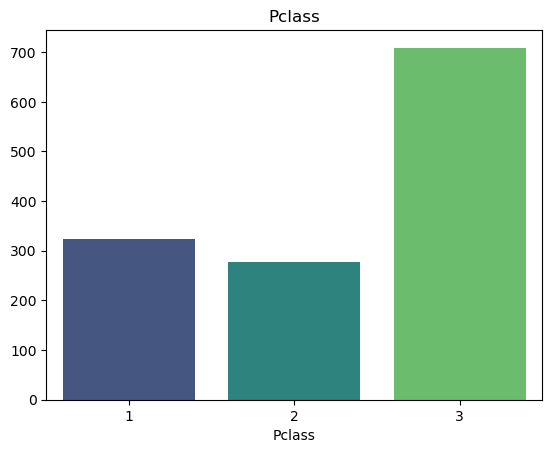

C:\Users\marti\AppData\Local\Temp\ipykernel_20620\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


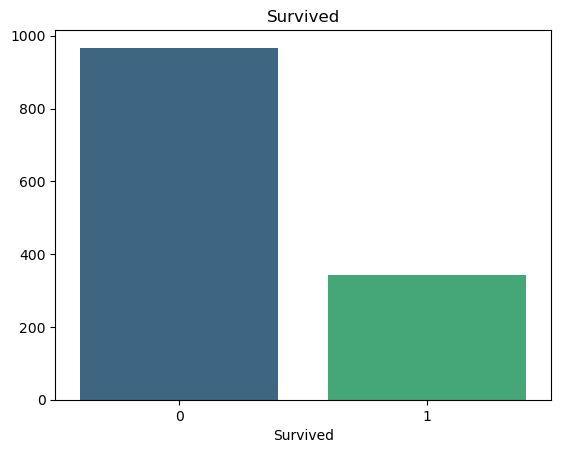

C:\Users\marti\AppData\Local\Temp\ipykernel_20620\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


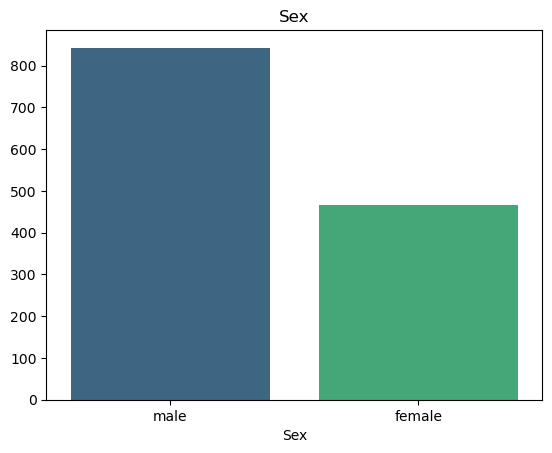

C:\Users\marti\AppData\Local\Temp\ipykernel_20620\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


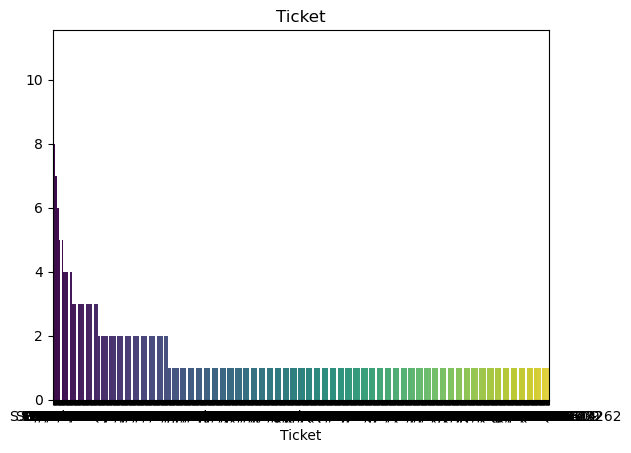

C:\Users\marti\AppData\Local\Temp\ipykernel_20620\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


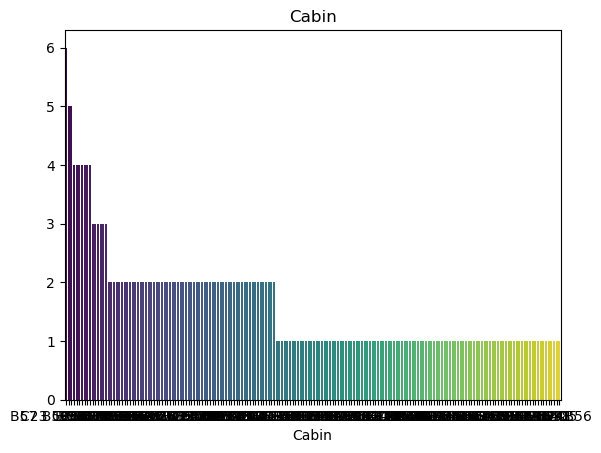

C:\Users\marti\AppData\Local\Temp\ipykernel_20620\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


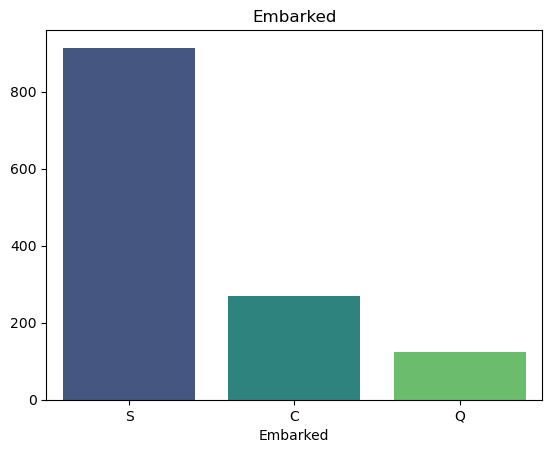

In [34]:
for i in df_cat.columns:
    sns.barplot(
        x=df_cat[i].value_counts().index, 
        y=df_cat[i].value_counts().values,
        palette='viridis'
    ).set_title(i)
    plt.show()

## We will start with Feature Engineering

In [35]:
# We will do feature engineering on Cabin first to extract the deck information, which might be useful for our model. We will create a new column called 'Deck' that contains the first letter of the 'Cabin' column, which represents the deck level. If the 'Cabin' value is missing, we will fill it with 'Unknown'. This way, we can capture any potential patterns related to the deck level and its impact on survival rates.
df_cat.Cabin
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
#After looking at this, we may want to look at cabin by letter or number.
df['cabin_multiple'].value_counts()


cabin_multiple
0    1014
1     254
2      26
3      10
4       5
Name: count, dtype: int64

In [36]:
#Now we will create categories based on the cabin letter, which represents the deck level. We will create a new column called 'Deck' that contains the first letter of the 'Cabin' column. If the 'Cabin' value is missing, we will fill it with 'Unknown'. This way, we can capture any potential patterns related to the deck level and its impact on survival rates.
df['cabin_advanced'] = df.Cabin.apply(lambda x: str(x)[0])
df['cabin_advanced'].value_counts()

cabin_advanced
n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [37]:
#Understand ticket values better
#Numeric vs Non-numeric
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [38]:
df['numeric_ticket'].value_counts()

numeric_ticket
1    957
0    352
Name: count, dtype: int64

In [39]:
#Lets us view all rows in dataframe through scrolling. This is for convinience
pd.set_option('display.max_rows', None)
df['ticket_letters'].value_counts()

ticket_letters
0            961
pc            92
ca            68
a5            28
sotonoq       24
stono2        21
scparis       19
wc            15
a4            10
fcc            9
soc            8
c              8
sopp           7
pp             4
wep            4
scah           4
fc             3
sotono2        3
sca4           2
sc             2
ppp            2
swpp           2
sp             1
sop            1
fa             1
scahbasle      1
scow           1
as             1
casoton        1
sca3           1
stonoq         1
aq4            1
a2             1
lp             1
aq3            1
Name: count, dtype: int64

In [40]:
#Difference in numeric vs non-numeric tickets in survival rates
pd.pivot_table(df, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,264,703
1,88,254


In [41]:
#Survival rate across different ticket types
pd.pivot_table(df, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a2,a4,a5,aq3,aq4,as,c,ca,casoton,...,sop,sopp,sotono2,sotonoq,sp,stono2,stonoq,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,706.0,1.0,10.0,26.0,1.0,1.0,1.0,6.0,54.0,1.0,...,1.0,7.0,3.0,22.0,1.0,13.0,1.0,NaN,14.0,3.0
1,255.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,14.0,NaN,...,NaN,NaN,NaN,2.0,NaN,8.0,NaN,2.0,1.0,1.0


In [42]:
#Feature Engineering on person's title
df.Name.head(50)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

name_title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

## Data Prepocessing for Model

In [43]:
#We will first create a "Flag" to separate Train vs Test data
#Our index is PassengerId, so we can use that to create the flag
#We mark Train as 1 and Test as 0

df['train_test'] = df.index.map(lambda x: 1 if x <= 891 else 0)

# We will impute the missing data
# We use the median from the TRAINING set only.

train_median_age = df[df['train_test'] == 1]['Age'].median()
train_median_fare = df[df['train_test'] == 1]['Fare'].median()

df['Age'] = df['Age'].fillna(train_median_age)
df['Fare'] = df['Fare'].fillna(train_median_fare)

#Drop the Missing values in Embarked column
#Only 2 rows in the training set have missing values.

df.dropna(subset=['Embarked'], inplace=True)

#Normalize the Fare column using Log Transformation
df['norm_fare'] = np.log(df['Fare'] + 1) # Adding 1 to avoid log(0)

# We will make Pclass a categorical variable instead of a numerical one.
#Converting to string ensures get_dummies as a category
df['Pclass'] = df['Pclass'].astype(str)

#One Hot Encodeing which will convert all categorical text into binary columns.
all_dummies = pd.get_dummies(df[[
    'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 
    'cabin_advanced', 'cabin_multiple', 'numeric_ticket', 'name_title', 'train_test'
]])

#This is our final split
#We will use the flag we created at the start to split the data back into Train and Test sets.
X_train = all_dummies[all_dummies['train_test'] == 1].drop('train_test', axis=1)
X_test = all_dummies[all_dummies['train_test'] == 0].drop('train_test', axis=1)

#Create the target variable (y) for training data
y_train = df[df['train_test'] == 1].Survived


y_train.shape



(889,)

In [44]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

#We will create a copy of our data to keep things clean
all_dummies_scaled = all_dummies.copy()

#We will fit and transform only the numeric columns
numeric_cols = ['Age', 'SibSp', 'Parch', 'norm_fare']
all_dummies_scaled[numeric_cols] = scale.fit_transform(all_dummies_scaled[numeric_cols])

#Split back into X_train_scaled and X_test_scaled
X_train_scaled = all_dummies_scaled[all_dummies_scaled['train_test'] == 1].drop('train_test', axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled['train_test'] == 0].drop('train_test', axis=1)

#Get the target variable
y_train = df[df['train_test'] == 1].Survived



## Model Building (Baseline Validation Performance)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model 1: Naive Bayes
model_1 = GaussianNB()
cv_1 = cross_val_score(model_1, X_train_scaled, y_train, cv=5)
print(f"Model 1 (Naive Bayes) CV Scores: {cv_1.mean():.4f} ")

#Model 2: Logistic Regression
model_2 = LogisticRegression(max_iter=2000)
cv_2 = cross_val_score(model_2, X_train_scaled, y_train, cv=5)
print(f"Model 2 (Logistic Regression) CV Scores: {cv_2.mean():.4f} ")

#Model 3: Decision Tree
model_3 = tree.DecisionTreeClassifier()
cv_3 = cross_val_score(model_3, X_train_scaled, y_train, cv=5)
print(f"Model 3 (Decision Tree) CV Scores: {cv_3.mean():.4f} ")

#Model 4: K-Nearest Neighbors
model_4 = KNeighborsClassifier()
cv_4 = cross_val_score(model_4, X_train_scaled, y_train, cv=5)
print(f"Model 4 (K-Nearest Neighbors) CV Scores: {cv_4.mean():.4f} ")

#Model 5: Random Forest
model_5 = RandomForestClassifier()
cv_5 = cross_val_score(model_5, X_train_scaled, y_train, cv=5)
print(f"Model 5 (Random Forest) CV Scores: {cv_5.mean():.4f} ")

#Model 6: Support Vector Machine
model_6 = SVC()
cv_6 = cross_val_score(model_6, X_train_scaled, y_train, cv=5)
print(f"Model 6 (Support Vector Machine) CV Scores: {cv_6.mean():.4f} ")


Model 1 (Naive Bayes) CV Scores: 0.7222 
Model 2 (Logistic Regression) CV Scores: 0.8223 
Model 3 (Decision Tree) CV Scores: 0.7818 
Model 4 (K-Nearest Neighbors) CV Scores: 0.8144 
Model 5 (Random Forest) CV Scores: 0.8021 
Model 6 (Support Vector Machine) CV Scores: 0.8336 


## The best model was the SVC (Support Vector Machine)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Setting up the model
#Probability=True allows us to predict percentages later.
svc = SVC(probability=True)

#Define the Parameter Grid
param_grid = [
    # Dict 1: Try RBF kernel with different Gamma and C
    {'kernel': ['rbf'], 'gamma': [.1, .5, 1, 2, 5, 10], 'C': [.1, 1, 10, 100, 1000]},
    
    # Dict 2: Try Linear kernel 
    {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
    
    # Dict 3: Try Polynomial kernel with different degrees and C
    {'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'C': [.1, 1, 10, 100, 1000]}
]

#Create the Grid Search
#verbose=1 showss the progress bar
#n_jobs=-1 uses ALL the computer cores to make it go faster
clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

#Train the data
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)

#Print results
print(f"Best Classifier Score: {best_clf_svc.best_score_:.4f}")
print(f"Best Parameters: {best_clf_svc.best_params_}")

Fitting 5 folds for each of 55 candidates, totalling 275 fits


## We are ready to sumbit and predict our results!


In [ ]:
best_model = best_clf_svc.best_estimator_

#Make predictions on the Test set
y_pred = best_model.predict(X_test_scaled)

#Create the Submission DataFrame
submission = pd.DataFrame({
    'PassengerId': X_test_scaled.index,
    'Survived': y_pred
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
